<a href="https://www.kaggle.com/code/raman2000/titanic-machine-learning?scriptVersionId=103130193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>



# **Titanic - Machine Learning from Disaster**
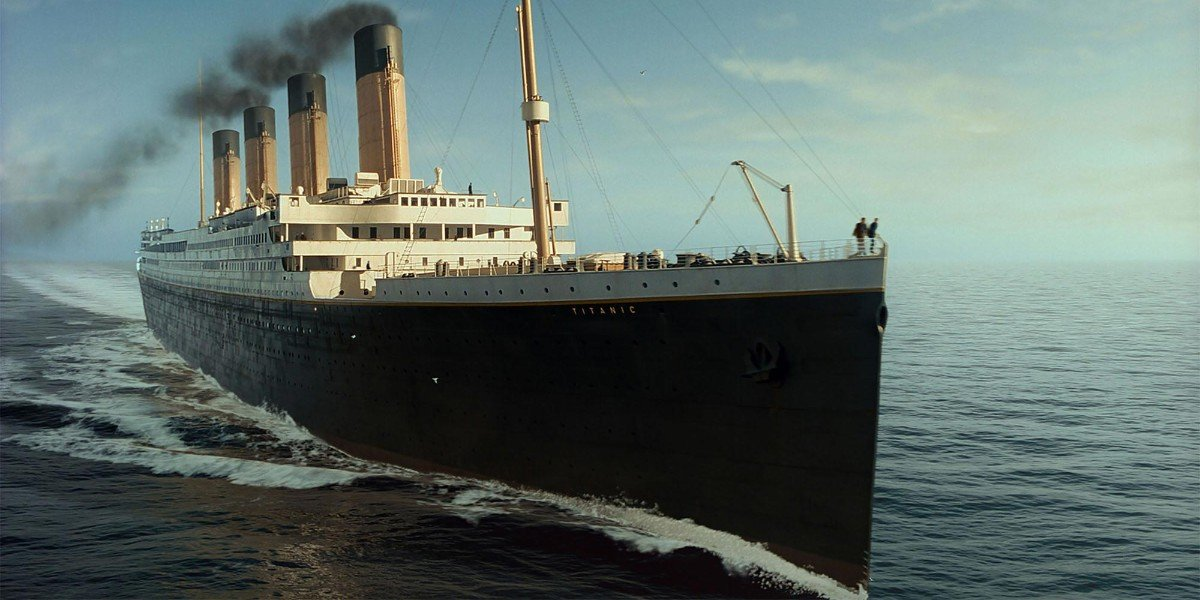

**The goal of this competition is create a model that predicts which passengers survived the Titanic shipwreck.**

Logistic Regression comes under Supervised Learning. Supervised Learning is when the algorithm learns on a labeled dataset and analyses the training data. These labeled data sets have inputs and expected outputs.

Supervised learning can be further split into classification and regression
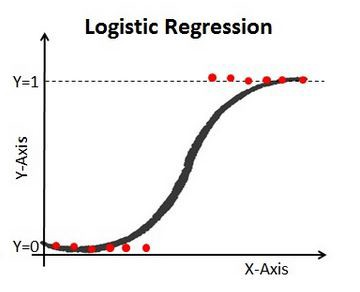

**Import python libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_data=pd.read_csv("../input/titanic/train.csv")
test_data=pd.read_csv("../input/titanic/test.csv")
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
def columns(a):
    for col in a.columns:
        print(col)
columns(titanic_data)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


**Data Analysis**

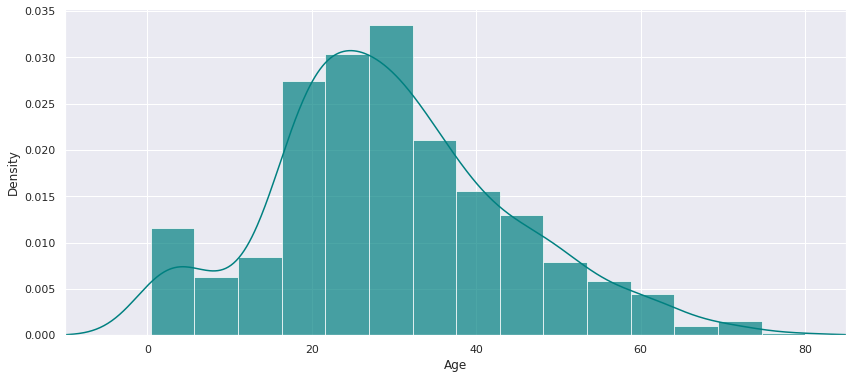

In [7]:
sns.set()
plt.figure(figsize=(14,6))
ax = titanic_data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.7)
titanic_data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [8]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

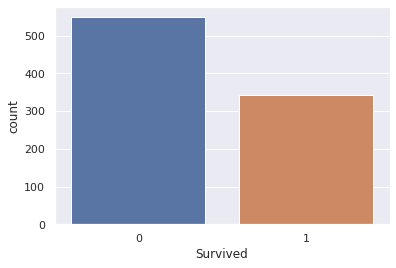

In [9]:
sns.countplot(x='Survived',data=titanic_data)

In [10]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

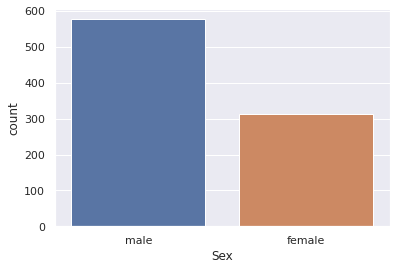

In [11]:
sns.countplot(x='Sex',data=titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

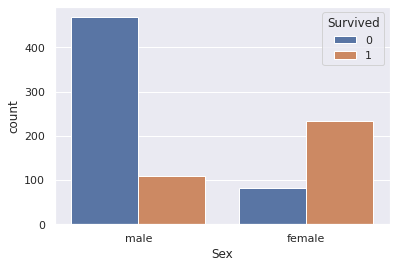

In [12]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

In [13]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

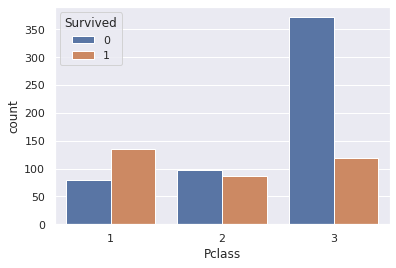

In [14]:

sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

**Data Moduling**

In [15]:
titanic_len=len(titanic_data)
df=pd.concat([titanic_data,test_data],axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Age','Embarked']
laen=LabelEncoder()
for col in cols:
    titanic_data[col]=laen.fit_transform(titanic_data[col])

In [17]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**Null values found in 3 columns**

   *   age
   *   Cabin
   *   Embarked 
   
   Delete all cabin columns and find the average value for age and fill it with null value, fill it whichever value is higher for Embarked

    Mean value :  29.69911764705882
    
    Whichever value occurs more times : S

In [18]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [19]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [20]:
df=df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [21]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
laen=LabelEncoder()
for col in cols:
    df[col]=laen.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [22]:
train_axis=df.iloc[:titanic_len,:]
test_axis=df.iloc[titanic_len:,:]

In [23]:
test_axis.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,3,1,34.5,0,0,7.8292,1
1,893,NaN,3,0,47.0,1,0,7.0000,2
2,894,NaN,2,1,62.0,0,0,9.6875,1
3,895,NaN,3,1,27.0,0,0,8.6625,2
4,896,NaN,3,0,22.0,1,1,12.2875,2


In [24]:
train_axis.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [25]:
x_axis=train_axis.drop(columns=['PassengerId','Survived'])
y_axis=train_axis['Survived']
y_axis.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

**Train Test Split**


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classif(model):
    x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.30, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy : ',model.score(x_test,y_test))
    score=cross_val_score(model,x_axis,y_axis,cv=5)
    print('CV Score : ',np.mean(score))

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classif(model)

Accuracy :  0.8134328358208955
CV Score :  0.786761659657272


In [28]:
model=LogisticRegression()
model.fit(x_axis,y_axis)

LogisticRegression()

In [29]:
test_axis.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,3,1,34.5,0,0,7.8292,1
1,893,NaN,3,0,47.0,1,0,7.0000,2
2,894,NaN,2,1,62.0,0,0,9.6875,1
3,895,NaN,3,1,27.0,0,0,8.6625,2
4,896,NaN,3,0,22.0,1,1,12.2875,2


In [30]:
x_test=test_axis.drop(columns=['PassengerId','Survived'],axis=1)

In [31]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [32]:
predi=model.predict(x_test)
predi

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

**Final Submission**

In [33]:
sub=pd.read_csv('../input/titanic/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
sub.to_csv('./submission.csv',index=False)
print('submission completed successfully')

submission completed successfully
